In [ ]:
r_seed=42

# Merge Data

In [ ]:
import pandas as pd
from google.colab import drive
import os

drive.mount("/content/drive", force_remount=True)

# Path ke folder di Google Drive (sesuaikan)
folder_path = "/content/drive/My Drive/minetoday/data_train/"

file_paths = {
    "pendaftaran": os.path.join(folder_path, "train_pendaftaran.csv"),
    "absensi": os.path.join(folder_path, "train_absensi.csv"),
    "pretest_py": os.path.join(folder_path, "train_pretest_py.csv"),
    "pretest_ml": os.path.join(folder_path, "train_pretest_ml.csv"),
    "pretest_st": os.path.join(folder_path, "train_pretest_st.csv"),
    "weekly_quiz": os.path.join(folder_path, "train_weekly_quiz.csv"),
    "mini_project": os.path.join(folder_path, "train_mini_project.csv"),
}

# Read and rename columns
dfs = {}
for key, path in file_paths.items():
    df = pd.read_csv(path)
    df = df.rename(columns={col: f"{key}_{col}" if col != "id" else col for col in df.columns})
    dfs[key] = df

# Merge all dataframes on 'id'
merged_df = None
for df in dfs.values():
    if merged_df is None:
        merged_df = df
    else:
        merged_df = pd.merge(merged_df, df, on="id", how="outer")

# Save to CSV
merged_df.to_csv("merged_dataset.csv", index=False)


Mounted at /content/drive


In [ ]:
merged_df

,id,pendaftaran_Timestamp,pendaftaran_Pilihan Jadwal Kelas,pendaftaran_Dari mana kamu mengetahui info ini ?,pendaftaran_Status,pendaftaran_Nama Kampus / Sekolah / Instansi,pendaftaran_Alasan Mengikuti Bootcamp Data Science di Intelligo ID,pendaftaran_Harapan setelah mengikuti Bootcamp,pendaftaran_Unnamed: 0,absensi_Timestamp,...,"pretest_st_Dalam pengujian hipotesis, jika kita menyatakan ""Gagal ditolak,"" apa yang ingin kita tunjukkan?",pretest_st_Unnamed: 0,weekly_quiz_Timestamp,weekly_quiz_Batch,weekly_quiz_Share link Google Colab kamu disini (jangan lupa diberi akses view),weekly_quiz_Unnamed: 0,mini_project_Timestamp,mini_project_Bootcamp,mini_project_Share link Google Slide atau Canva kamu disini (jangan lupa diberi akses view),mini_project_Unnamed: 0
0,063c738e-30ae-49ad-877d-d97287e94231,4/21/2024 9:03:51,Bootcamp Data Science For Beginner Batch 9 - M...,Website,Pekerja aktif,Politeknik TEDC Bandung,Tertarik untuk switch career ke data analyst,Dapat memperoleh kompetensi yg sesuai dengan y...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0a986dd7-a658-40a9-9d1b-d3074e036e35,4/26/2024 10:05:37,Bootcamp Data Science For Beginner Batch 8 - M...,LinkedIn,Fresh Graduates,PENS,Ingin switch karir karna saya melihat potensi ...,Mendapatkan skill dalam menganalisa dan membua...,37.0,10/10/2023 21:27:56,...,d. Kita tidak memiliki cukup bukti untuk menol...,37.0,5/21/2024 21:27:17,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,37.0,NaN,NaN,NaN,NaN
2,0a986dd7-a658-40a9-9d1b-d3074e036e35,4/26/2024 10:05:37,Bootcamp Data Science For Beginner Batch 8 - M...,LinkedIn,Fresh Graduates,PENS,Ingin switch karir karna saya melihat potensi ...,Mendapatkan skill dalam menganalisa dan membua...,37.0,8/8/2024 22:08:31,...,d. Kita tidak memiliki cukup bukti untuk menol...,37.0,5/21/2024 21:27:17,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,37.0,NaN,NaN,NaN,NaN
3,0a986dd7-a658-40a9-9d1b-d3074e036e35,4/26/2024 10:05:37,Bootcamp Data Science For Beginner Batch 8 - M...,LinkedIn,Fresh Graduates,PENS,Ingin switch karir karna saya melihat potensi ...,Mendapatkan skill dalam menganalisa dan membua...,37.0,7/18/2024 21:28:35,...,d. Kita tidak memiliki cukup bukti untuk menol...,37.0,5/21/2024 21:27:17,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,37.0,NaN,NaN,NaN,NaN
4,0a986dd7-a658-40a9-9d1b-d3074e036e35,4/26/2024 10:05:37,Bootcamp Data Science For Beginner Batch 8 - M...,LinkedIn,Fresh Graduates,PENS,Ingin switch karir karna saya melihat potensi ...,Mendapatkan skill dalam menganalisa dan membua...,37.0,3/24/2024 16:50:39,...,d. Kita tidak memiliki cukup bukti untuk menol...,37.0,5/21/2024 21:27:17,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,37.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12197,ff9d3a2b-707a-4274-9447-421946699738,6/18/2024 16:35:47,NaN,Instagram ads,Fresh Graduates,Universitas Pancasila,"Skil , karier dan job",memiliki insight baru setiap menghadapi masala...,109.0,6/25/2024 21:33:48,...,d. Kita tidak memiliki cukup bukti untuk menol...,109.0,5/21/2024 21:30:08,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,109.0,5/31/2025 11:17:05,NaN,https://docs.google.com/xxxxxxxxxxxxxxxxxxxxxxxxx,109.0
12198,ff9d3a2b-707a-4274-9447-421946699738,6/18/2024 16:35:47,NaN,Instagram ads,Fresh Graduates,Universitas Pancasila,"Skil , karier dan job",memiliki insight baru setiap menghadapi masala...,109.0,2/20/2024 21:31:05,...,d. Kita tidak memiliki cukup bukti untuk menol...,109.0,5/21/2024 21:30:08,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,109.0,5/31/2025 11:17:05,NaN,https://docs.google.com/xxxxxxxxxxxxxxxxxxxxxxxxx,109.0
12199,ff9d3a2b-707a-4274-9447-421946699738,6/18/2024 16:35:47,NaN,Instagram ads,Fresh Graduates,Universitas Pancasila,"Skil , karier dan job",memiliki insight baru setiap menghadapi masala...,109.0,6/25/2024 21:33:48,...,d. Kita tidak memiliki cukup bukti untuk menol...,109.0,5/21/2024 21:30:08,9.0,https://colab.

In [ ]:
merged_df.columns

Index(['id', 'pendaftaran_Timestamp', 'pendaftaran_Pilihan Jadwal Kelas',
       'pendaftaran_Dari mana kamu mengetahui info ini ?',
       'pendaftaran_Status', 'pendaftaran_Nama Kampus / Sekolah / Instansi',
       'pendaftaran_Alasan Mengikuti Bootcamp Data Science di Intelligo ID',
       'pendaftaran_Harapan setelah mengikuti Bootcamp',
       'pendaftaran_Unnamed: 0', 'absensi_Timestamp',
       'absensi_Tanggal hari ini ', 'absensi_Pertemuan ke-',
       'absensi_Kualitas materi ', 'absensi_Siapa trainer pada hari ini ?',
       'absensi_Bagaimana menurut Trainer pada hari ini ?',
       'absensi_Kualitas trainer ',
       'absensi_Apakah ada saran secara keseluruhan ?',
       'absensi_Kamu mengikuti Bootcamp Batch ?', 'absensi_Tanggal hari ini',
       'absensi_Pertemuan ke', 'pretest_py_Timestamp', 'pretest_py_Score',
       'pretest_py_1. Bahasa Python bisa digunakan untuk membuat apa saja ? kecuali...',
       'pretest_py_2. Salah satu syarat dalam mendefinisikan variabel, 

In [ ]:
# Hapus duplikat berdasarkan seluruh baris
merged_nodup_df = merged_df.drop_duplicates()
merged_nodup_df.to_csv("merged_dataset_nodup.csv", index=False)

In [ ]:
merged_nodup_df

,id,pendaftaran_Timestamp,pendaftaran_Pilihan Jadwal Kelas,pendaftaran_Dari mana kamu mengetahui info ini ?,pendaftaran_Status,pendaftaran_Nama Kampus / Sekolah / Instansi,pendaftaran_Alasan Mengikuti Bootcamp Data Science di Intelligo ID,pendaftaran_Harapan setelah mengikuti Bootcamp,pendaftaran_Unnamed: 0,absensi_Timestamp,...,"pretest_st_Dalam pengujian hipotesis, jika kita menyatakan ""Gagal ditolak,"" apa yang ingin kita tunjukkan?",pretest_st_Unnamed: 0,weekly_quiz_Timestamp,weekly_quiz_Batch,weekly_quiz_Share link Google Colab kamu disini (jangan lupa diberi akses view),weekly_quiz_Unnamed: 0,mini_project_Timestamp,mini_project_Bootcamp,mini_project_Share link Google Slide atau Canva kamu disini (jangan lupa diberi akses view),mini_project_Unnamed: 0
0,063c738e-30ae-49ad-877d-d97287e94231,4/21/2024 9:03:51,Bootcamp Data Science For Beginner Batch 9 - M...,Website,Pekerja aktif,Politeknik TEDC Bandung,Tertarik untuk switch career ke data analyst,Dapat memperoleh kompetensi yg sesuai dengan y...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0a986dd7-a658-40a9-9d1b-d3074e036e35,4/26/2024 10:05:37,Bootcamp Data Science For Beginner Batch 8 - M...,LinkedIn,Fresh Graduates,PENS,Ingin switch karir karna saya melihat potensi ...,Mendapatkan skill dalam menganalisa dan membua...,37.0,10/10/2023 21:27:56,...,d. Kita tidak memiliki cukup bukti untuk menol...,37.0,5/21/2024 21:27:17,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,37.0,NaN,NaN,NaN,NaN
2,0a986dd7-a658-40a9-9d1b-d3074e036e35,4/26/2024 10:05:37,Bootcamp Data Science For Beginner Batch 8 - M...,LinkedIn,Fresh Graduates,PENS,Ingin switch karir karna saya melihat potensi ...,Mendapatkan skill dalam menganalisa dan membua...,37.0,8/8/2024 22:08:31,...,d. Kita tidak memiliki cukup bukti untuk menol...,37.0,5/21/2024 21:27:17,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,37.0,NaN,NaN,NaN,NaN
3,0a986dd7-a658-40a9-9d1b-d3074e036e35,4/26/2024 10:05:37,Bootcamp Data Science For Beginner Batch 8 - M...,LinkedIn,Fresh Graduates,PENS,Ingin switch karir karna saya melihat potensi ...,Mendapatkan skill dalam menganalisa dan membua...,37.0,7/18/2024 21:28:35,...,d. Kita tidak memiliki cukup bukti untuk menol...,37.0,5/21/2024 21:27:17,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,37.0,NaN,NaN,NaN,NaN
4,0a986dd7-a658-40a9-9d1b-d3074e036e35,4/26/2024 10:05:37,Bootcamp Data Science For Beginner Batch 8 - M...,LinkedIn,Fresh Graduates,PENS,Ingin switch karir karna saya melihat potensi ...,Mendapatkan skill dalam menganalisa dan membua...,37.0,3/24/2024 16:50:39,...,d. Kita tidak memiliki cukup bukti untuk menol...,37.0,5/21/2024 21:27:17,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,37.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12197,ff9d3a2b-707a-4274-9447-421946699738,6/18/2024 16:35:47,NaN,Instagram ads,Fresh Graduates,Universitas Pancasila,"Skil , karier dan job",memiliki insight baru setiap menghadapi masala...,109.0,6/25/2024 21:33:48,...,d. Kita tidak memiliki cukup bukti untuk menol...,109.0,5/21/2024 21:30:08,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,109.0,5/31/2025 11:17:05,NaN,https://docs.google.com/xxxxxxxxxxxxxxxxxxxxxxxxx,109.0
12198,ff9d3a2b-707a-4274-9447-421946699738,6/18/2024 16:35:47,NaN,Instagram ads,Fresh Graduates,Universitas Pancasila,"Skil , karier dan job",memiliki insight baru setiap menghadapi masala...,109.0,2/20/2024 21:31:05,...,d. Kita tidak memiliki cukup bukti untuk menol...,109.0,5/21/2024 21:30:08,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,109.0,5/31/2025 11:17:05,NaN,https://docs.google.com/xxxxxxxxxxxxxxxxxxxxxxxxx,109.0
12199,ff9d3a2b-707a-4274-9447-421946699738,6/18/2024 16:35:47,NaN,Instagram ads,Fresh Graduates,Universitas Pancasila,"Skil , karier dan job",memiliki insight baru setiap menghadapi masala...,109.0,6/25/2024 21:33:48,...,d. Kita tidak memiliki cukup bukti untuk menol...,109.0,5/21/2024 21:30:08,9.0,https://colab.

# Cluster Analysis

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load data
df = pd.read_csv('merged_dataset_nodup.csv')
df.columns = df.columns.str.strip()

In [ ]:
df.columns

Index(['id', 'pendaftaran_Timestamp', 'pendaftaran_Pilihan Jadwal Kelas',
       'pendaftaran_Dari mana kamu mengetahui info ini ?',
       'pendaftaran_Status', 'pendaftaran_Nama Kampus / Sekolah / Instansi',
       'pendaftaran_Alasan Mengikuti Bootcamp Data Science di Intelligo ID',
       'pendaftaran_Harapan setelah mengikuti Bootcamp',
       'pendaftaran_Unnamed: 0', 'absensi_Timestamp',
       'absensi_Tanggal hari ini', 'absensi_Pertemuan ke-',
       'absensi_Kualitas materi', 'absensi_Siapa trainer pada hari ini ?',
       'absensi_Bagaimana menurut Trainer pada hari ini ?',
       'absensi_Kualitas trainer',
       'absensi_Apakah ada saran secara keseluruhan ?',
       'absensi_Kamu mengikuti Bootcamp Batch ?', 'absensi_Tanggal hari ini',
       'absensi_Pertemuan ke', 'pretest_py_Timestamp', 'pretest_py_Score',
       'pretest_py_1. Bahasa Python bisa digunakan untuk membuat apa saja ? kecuali...',
       'pretest_py_2. Salah satu syarat dalam mendefinisikan variabel, kec

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np
import re

class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.columns_ = None

    def extract_meeting_number(self, x):
        if isinstance(x, str) and re.search(r'(\d+)', x):
            return int(re.search(r'(\d+)', x).group(1))
        return np.nan

    def parse_score(self, x):
        if isinstance(x, str):
            match = re.search(r'(\d+)', x)
            if match:
                return float(match.group(1)) / 100.0
        return np.nan


    def transform(self, df):
        df = df.copy()
        df.columns = df.columns.str.strip()

        # Convert skor ke float
        df['pretest_py_Score'] = df['pretest_py_Score'].apply(self.parse_score)
        df['pretest_ml_Score'] = df['pretest_ml_Score'].apply(self.parse_score)
        df['pretest_st_Score'] = df['pretest_st_Score'].apply(self.parse_score)

        # Ambil meeting number
        df['meeting_number'] = df['absensi_Pertemuan ke'].apply(self.extract_meeting_number)

        # Konversi rating
        df['material_quality'] = pd.to_numeric(df['absensi_Kualitas materi'], errors='coerce')
        df['trainer_quality'] = pd.to_numeric(df['absensi_Kualitas trainer'], errors='coerce')

        # Group by id
        df_feat = df.groupby('id').agg({
            'pretest_py_Score': 'max',
            'pretest_ml_Score': 'max',
            'pretest_st_Score': 'max',
            'meeting_number': lambda x: x.nunique() / df['absensi_Pertemuan ke'].apply(self.extract_meeting_number).nunique(),
            'material_quality': 'mean',
            'trainer_quality': 'mean',
            'weekly_quiz_Share link Google Colab kamu disini (jangan lupa diberi akses view)': lambda x: 1.0 if x.dropna().any() else 0.0,
            'mini_project_Share link Google Slide atau Canva kamu disini (jangan lupa diberi akses view)': lambda x: 1.0 if x.dropna().any() else 0.0
        }).reset_index()

        df_feat.columns = [
            'id', 'pretest_py', 'pretest_ml', 'pretest_st',
            'attendance_ratio', 'material_quality', 'trainer_quality',
            'weekly_quiz_submitted', 'mini_project_submitted'
        ]

        if self.columns_ is None:
            self.columns_ = df_feat.columns

        return df_feat

    def fit(self, df, y=None):
        self.transform(df)
        return self


In [ ]:
fe = FeatureEngineer()
df_features = fe.fit_transform(df)

In [ ]:
df_features

,id,pretest_py,pretest_ml,pretest_st,attendance_ratio,material_quality,trainer_quality,weekly_quiz_submitted,mini_project_submitted
0,063c738e-30ae-49ad-877d-d97287e94231,NaN,NaN,NaN,0.000000,NaN,NaN,0.0,0.0
1,0a986dd7-a658-40a9-9d1b-d3074e036e35,0.9,1.0,1.0,1.000000,4.566667,4.333333,1.0,0.0
2,0aa927af-2e14-47b5-bb75-c1c700b13262,0.8,0.5,0.9,0.833333,4.440000,4.480000,1.0,0.0
3,0abe9114-4d57-4368-9b74-8ff8d5ab22cf,0.9,0.5,0.9,0.600000,4.388889,4.722222,1.0,0.0
4,0b187bd8-2c9e-4c1a-ad95-1ac60fa3f39d,0.8,0.4,0.9,0.666667,4.400000,4.550000,1.0,0.0
...,...,...,...,...,...,...,...,...,...
544,fe2ef5d1-e5b0-4c59-b553-8a14aa6485fd,0.8,0.5,0.9,0.933333,4.392857,4.535714,1.0,1.0
545,fea9deb6-7320-4e71-8c81-a5529ccdd68c,0.9,0.4,1.0,0.766667,4.652174,4.869565,1.0,1.0
546,fefb10d9-4247-4d30-b89d-9efd8c703bf1,0.8,0.9,0.8,0.766667,4.565217,4.695652,1.0,1.0
547,ff4a3b75-5599-4d90-95f0-8a1bf29c5849,0.7,0.5,0.5,0.900000,4.481481,4.296296,1.0,1.0


In [ ]:
df_feat = df_features.copy()

## KMeans

In [ ]:
# Clustering KMeans
X = df_features.drop('id', axis=1).fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=r_seed)
df_features['cluster'] = kmeans.fit_predict(X_scaled)


In [ ]:
# Tentukan cluster mana yang "lulus"
# Pilih hanya kolom numerik untuk menghitung rata-rata per cluster
numeric_cols = df_features.select_dtypes(include=[np.number]).columns.difference(['cluster'])
cluster_summary = df_features.groupby('cluster')[numeric_cols].mean()


lulus_cluster = cluster_summary.mean(axis=1).idxmax()

In [ ]:
# labeling
df_features['label'] = df_features['cluster'].apply(lambda x: 'lulus' if x == lulus_cluster else 'tidak')

# Hasil akhir
df_final = df_features[['id', 'pretest_py', 'pretest_ml', 'pretest_st',
                        'attendance_ratio', 'material_quality', 'trainer_quality',
                        'weekly_quiz_submitted', 'mini_project_submitted', 'label']]


df_final.to_csv('data_peserta_dengan_label_KMeans.csv', index=False)

In [ ]:
df_final

,id,pretest_py,pretest_ml,pretest_st,attendance_ratio,material_quality,trainer_quality,weekly_quiz_submitted,mini_project_submitted,label
0,063c738e-30ae-49ad-877d-d97287e94231,NaN,NaN,NaN,0.000000,NaN,NaN,0.0,0.0,tidak
1,0a986dd7-a658-40a9-9d1b-d3074e036e35,0.9,1.0,1.0,1.000000,4.566667,4.333333,1.0,0.0,lulus
2,0aa927af-2e14-47b5-bb75-c1c700b13262,0.8,0.5,0.9,0.833333,4.440000,4.480000,1.0,0.0,lulus
3,0abe9114-4d57-4368-9b74-8ff8d5ab22cf,0.9,0.5,0.9,0.600000,4.388889,4.722222,1.0,0.0,lulus
4,0b187bd8-2c9e-4c1a-ad95-1ac60fa3f39d,0.8,0.4,0.9,0.666667,4.400000,4.550000,1.0,0.0,lulus
...,...,...,...,...,...,...,...,...,...,...
544,fe2ef5d1-e5b0-4c59-b553-8a14aa6485fd,0.8,0.5,0.9,0.933333,4.392857,4.535714,1.0,1.0,lulus
545,fea9deb6-7320-4e71-8c81-a5529ccdd68c,0.9,0.4,1.0,0.766667,4.652174,4.869565,1.0,1.0,lulus
546,fefb10d9-4247-4d30-b89d-9efd8c703bf1,0.8,0.9,0.8,0.766667,4.565217,4.695652,1.0,1.0,lulus
547,ff4a3b75-5599-4d90-95f0-8a1bf29c5849,0.7,0.5,0.5,0.900000,4.481481,4.296296,1.0,1.0,lulus


In [ ]:
df_final.value_counts('label')

,count
label,
lulus,486
tidak,63


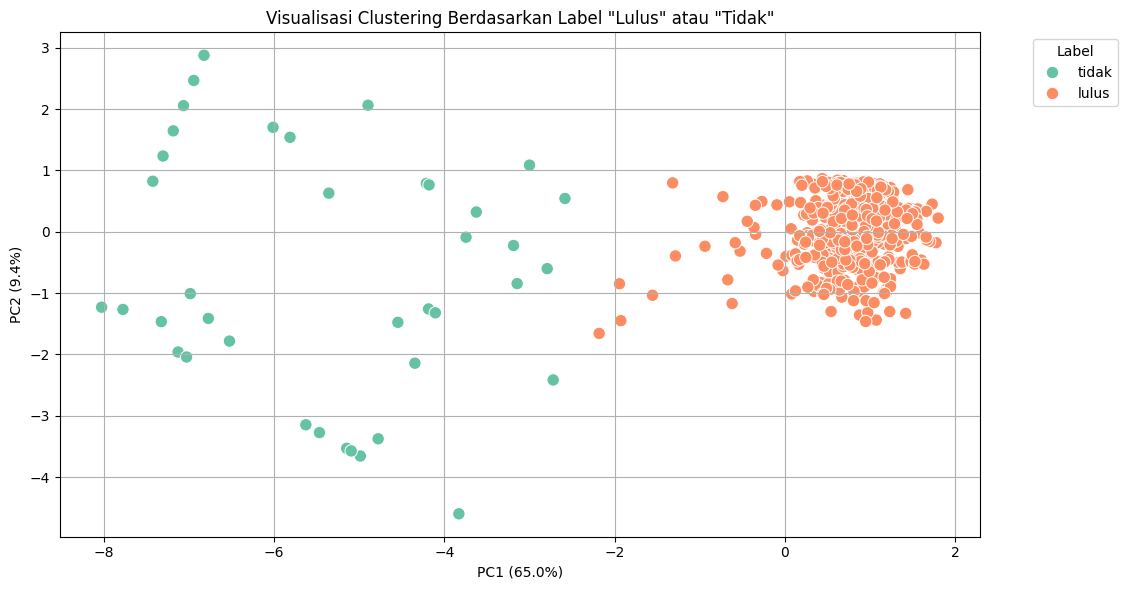

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

X = df_features.drop(columns=['id', 'cluster', 'label'])


X_filled = X.fillna(0)

# Standardisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filled)

# PCA ke 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

df_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_plot['label'] = df_features['label']  # gunakan label "lulus/tidak"

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_plot,
    x='PC1',
    y='PC2',
    hue='label',
    palette='Set2',
    s=80
)
plt.title('Visualisasi Clustering Berdasarkan Label "Lulus" atau "Tidak"')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Drop kolom non-numerik
X_numeric = df_final.drop(columns=['id', 'label'])

# Isi NaN dengan 0 atau bisa diganti strategi lain
X_filled = X_numeric.fillna(0)

# Standardisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filled)

# PCA ke 3D
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Buat DataFrame hasil PCA
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['label'] = df_final['label']

# Plot 3D interaktif
fig = px.scatter_3d(
    df_pca, x='PC1', y='PC2', z='PC3',
    color='label',
    title='Visualisasi 3D Clustering (Lulus / Tidak)',
    labels={'label': 'Lulus'},
    opacity=0.7
)
fig.update_layout(scene=dict(
    xaxis_title=f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)",
    yaxis_title=f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)",
    zaxis_title=f"PC3 ({pca.explained_variance_ratio_[2]*100:.1f}%)",
))
fig.show()


## GMM

In [ ]:
#  Clustering KMeans
X = df_feat.drop('id', axis=1).fillna(0)
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, random_state=r_seed)

df_feat['cluster'] = gmm.fit_predict(X_scaled)

In [ ]:

numeric_cols = df_feat.select_dtypes(include=[np.number]).columns.difference(['cluster'])
cluster_summary = df_feat.groupby('cluster')[numeric_cols].mean()


lulus_cluster = cluster_summary.mean(axis=1).idxmax()

In [ ]:

df_feat['label'] = df_feat['cluster'].apply(lambda x: 'lulus' if x == lulus_cluster else 'tidak')

df_final = df_feat[['id', 'pretest_py', 'pretest_ml', 'pretest_st',
                        'attendance_ratio', 'material_quality', 'trainer_quality',
                        'weekly_quiz_submitted', 'mini_project_submitted', 'label']]


df_final.to_csv('data_peserta_dengan_label_GMM.csv', index=False)

In [ ]:
df_final

,id,pretest_py,pretest_ml,pretest_st,attendance_ratio,material_quality,trainer_quality,weekly_quiz_submitted,mini_project_submitted,label
0,063c738e-30ae-49ad-877d-d97287e94231,NaN,NaN,NaN,0.000000,NaN,NaN,0.0,0.0,tidak
1,0a986dd7-a658-40a9-9d1b-d3074e036e35,0.9,1.0,1.0,1.000000,4.566667,4.333333,1.0,0.0,lulus
2,0aa927af-2e14-47b5-bb75-c1c700b13262,0.8,0.5,0.9,0.833333,4.440000,4.480000,1.0,0.0,lulus
3,0abe9114-4d57-4368-9b74-8ff8d5ab22cf,0.9,0.5,0.9,0.600000,4.388889,4.722222,1.0,0.0,lulus
4,0b187bd8-2c9e-4c1a-ad95-1ac60fa3f39d,0.8,0.4,0.9,0.666667,4.400000,4.550000,1.0,0.0,lulus
...,...,...,...,...,...,...,...,...,...,...
544,fe2ef5d1-e5b0-4c59-b553-8a14aa6485fd,0.8,0.5,0.9,0.933333,4.392857,4.535714,1.0,1.0,lulus
545,fea9deb6-7320-4e71-8c81-a5529ccdd68c,0.9,0.4,1.0,0.766667,4.652174,4.869565,1.0,1.0,lulus
546,fefb10d9-4247-4d30-b89d-9efd8c703bf1,0.8,0.9,0.8,0.766667,4.565217,4.695652,1.0,1.0,lulus
547,ff4a3b75-5599-4d90-95f0-8a1bf29c5849,0.7,0.5,0.5,0.900000,4.481481,4.296296,1.0,1.0,lulus


In [ ]:
df_final.value_counts('label')

,count
label,
lulus,480
tidak,69


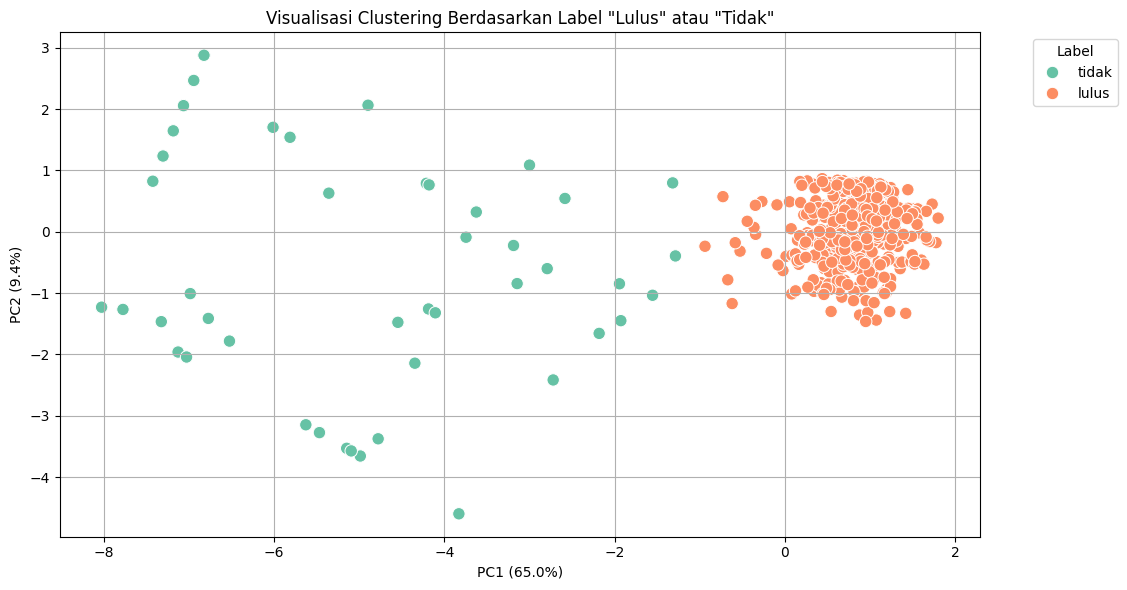

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

X = df_feat.drop(columns=['id', 'cluster', 'label'])

X_filled = X.fillna(0)

# Standardisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filled)

# PCA ke 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

df_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_plot['label'] = df_feat['label']  # gunakan label "lulus/tidak"

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_plot,
    x='PC1',
    y='PC2',
    hue='label',
    palette='Set2',
    s=80
)
plt.title('Visualisasi Clustering Berdasarkan Label "Lulus" atau "Tidak"')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_numeric = df_final.drop(columns=['id', 'label'])

X_filled = X_numeric.fillna(0)

# Standardisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filled)

# PCA ke 3D
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['label'] = df_final['label']

# Plot 3D
fig = px.scatter_3d(
    df_pca, x='PC1', y='PC2', z='PC3',
    color='label',
    title='Visualisasi 3D Clustering (Lulus / Tidak)',
    labels={'label': 'Lulus'},
    opacity=0.7
)
fig.update_layout(scene=dict(
    xaxis_title=f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)",
    yaxis_title=f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)",
    zaxis_title=f"PC3 ({pca.explained_variance_ratio_[2]*100:.1f}%)",
))
fig.show()


# Modelling and Predicting

## Test Data Load and FE

In [ ]:
import pandas as pd
from google.colab import drive
import os

drive.mount("/content/drive", force_remount=True)

# Path ke folder di Google Drive (sesuaikan)
folder_path = "/content/drive/My Drive/minetoday/data_test/"

file_paths = {
    "pendaftaran": os.path.join(folder_path, "test_pendaftaran.csv"),
    "absensi": os.path.join(folder_path, "test_absensi.csv"),
    "pretest_py": os.path.join(folder_path, "test_pretest_py.csv"),
    "pretest_ml": os.path.join(folder_path, "test_pretest_ml.csv"),
    "pretest_st": os.path.join(folder_path, "test_pretest_st.csv"),
    "weekly_quiz": os.path.join(folder_path, "test_weekly_quiz.csv"),
    "mini_project": os.path.join(folder_path, "test_mini_project.csv"),
}

# Read and rename columns
dfs = {}
for key, path in file_paths.items():
    df = pd.read_csv(path)
    df = df.rename(columns={col: f"{key}_{col}" if col != "id" else col for col in df.columns})
    dfs[key] = df

# Merge all dataframes on 'id'
merged_df = None
for df in dfs.values():
    if merged_df is None:
        merged_df = df
    else:
        merged_df = pd.merge(merged_df, df, on="id", how="outer")

# Save to CSV
merged_df.to_csv("merged_dataset_test.csv", index=False)


Mounted at /content/drive


In [ ]:
merged_df_test = merged_df
merged_df_test

,id,pendaftaran_Timestamp,pendaftaran_Pilihan Jadwal Kelas,pendaftaran_Dari mana kamu mengetahui info ini ?,pendaftaran_Status,pendaftaran_Nama Kampus / Sekolah / Instansi,pendaftaran_Alasan Mengikuti Bootcamp Data Science di Intelligo ID,pendaftaran_Harapan setelah mengikuti Bootcamp,pendaftaran_Unnamed: 0,absensi_Timestamp,...,"pretest_st_Dalam pengujian hipotesis, jika kita menyatakan ""Gagal ditolak,"" apa yang ingin kita tunjukkan?",pretest_st_Unnamed: 0,weekly_quiz_Timestamp,weekly_quiz_Batch,weekly_quiz_Share link Google Colab kamu disini (jangan lupa diberi akses view),weekly_quiz_Unnamed: 0,mini_project_Timestamp,mini_project_Bootcamp,mini_project_Share link Google Slide atau Canva kamu disini (jangan lupa diberi akses view),mini_project_Unnamed: 0
0,0028102b-576f-4819-b1df-8c0e7ae0247b,7/1/2024 16:14:41,Bootcamp Data Science For Beginner Batch 9 - M...,Instagram,Mahasiswa,UGM,Ingin mengembangkan karir di bidang Data Science,bekerja dibidangnya,330.0,2/1/2024 20:54:28,...,d. Kita tidak memiliki cukup bukti untuk menol...,330.0,5/21/2024 21:30:08,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,330.0,8/1/2024 21:16:57,NaN,https://docs.google.com/xxxxxxxxxxxxxxxxxxxxxxxxx,330.0
1,0028102b-576f-4819-b1df-8c0e7ae0247b,7/1/2024 16:14:41,Bootcamp Data Science For Beginner Batch 9 - M...,Instagram,Mahasiswa,UGM,Ingin mengembangkan karir di bidang Data Science,bekerja dibidangnya,330.0,10/7/2023 9:31:50,...,d. Kita tidak memiliki cukup bukti untuk menol...,330.0,5/21/2024 21:30:08,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,330.0,8/1/2024 21:16:57,NaN,https://docs.google.com/xxxxxxxxxxxxxxxxxxxxxxxxx,330.0
2,0028102b-576f-4819-b1df-8c0e7ae0247b,7/1/2024 16:14:41,Bootcamp Data Science For Beginner Batch 9 - M...,Instagram,Mahasiswa,UGM,Ingin mengembangkan karir di bidang Data Science,bekerja dibidangnya,330.0,2/22/2024 20:21:26,...,d. Kita tidak memiliki cukup bukti untuk menol...,330.0,5/21/2024 21:30:08,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,330.0,8/1/2024 21:16:57,NaN,https://docs.google.com/xxxxxxxxxxxxxxxxxxxxxxxxx,330.0
3,0028102b-576f-4819-b1df-8c0e7ae0247b,7/1/2024 16:14:41,Bootcamp Data Science For Beginner Batch 9 - M...,Instagram,Mahasiswa,UGM,Ingin mengembangkan karir di bidang Data Science,bekerja dibidangnya,330.0,6/20/2024 21:35:47,...,d. Kita tidak memiliki cukup bukti untuk menol...,330.0,5/21/2024 21:30:08,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,330.0,8/1/2024 21:16:57,NaN,https://docs.google.com/xxxxxxxxxxxxxxxxxxxxxxxxx,330.0
4,0028102b-576f-4819-b1df-8c0e7ae0247b,7/1/2024 16:14:41,Bootcamp Data Science For Beginner Batch 9 - M...,Instagram,Mahasiswa,UGM,Ingin mengembangkan karir di bidang Data Science,bekerja dibidangnya,330.0,7/25/2024 21:42:47,...,d. Kita tidak memiliki cukup bukti untuk menol...,330.0,5/21/2024 21:30:08,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,330.0,8/1/2024 21:16:57,NaN,https://docs.google.com/xxxxxxxxxxxxxxxxxxxxxxxxx,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,f9b2def2-c8ea-436c-bf7c-934a1742b0af,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/20/2024 21:05:41,...,c. Kita memiliki cukup bukti untuk menyatakan ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1109,f9b2def2-c8ea-436c-bf7c-934a1742b0af,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/25/2024 20:44:30,...,c. Kita memiliki cukup bukti untuk menyatakan ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1110,f9b2def2-c8ea-436c-bf7c-934a1742b0af,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/25/2024 20:44:30,...,c. Kita memiliki cukup bukti untuk menyatakan ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1111,f9b2def2-c8ea-436c-bf7c-934a1742b0af,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/9/2024 20:53:16,...,c. Kita memiliki cukup bukti untuk menyatakan ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_df_test.columns

Index(['id', 'pendaftaran_Timestamp', 'pendaftaran_Pilihan Jadwal Kelas',
       'pendaftaran_Dari mana kamu mengetahui info ini ?',
       'pendaftaran_Status', 'pendaftaran_Nama Kampus / Sekolah / Instansi',
       'pendaftaran_Alasan Mengikuti Bootcamp Data Science di Intelligo ID',
       'pendaftaran_Harapan setelah mengikuti Bootcamp',
       'pendaftaran_Unnamed: 0', 'absensi_Timestamp',
       'absensi_Tanggal hari ini ', 'absensi_Pertemuan ke-',
       'absensi_Kualitas materi ', 'absensi_Siapa trainer pada hari ini ?',
       'absensi_Bagaimana menurut Trainer pada hari ini ?',
       'absensi_Kualitas trainer ',
       'absensi_Apakah ada saran secara keseluruhan ?',
       'absensi_Kamu mengikuti Bootcamp Batch ?', 'absensi_Tanggal hari ini',
       'absensi_Pertemuan ke', 'pretest_py_Timestamp', 'pretest_py_Score',
       'pretest_py_1. Bahasa Python bisa digunakan untuk membuat apa saja ? kecuali...',
       'pretest_py_2. Salah satu syarat dalam mendefinisikan variabel, 

In [ ]:
# Hapus duplikat berdasarkan seluruh baris
merged_nodup_df_test = merged_df_test.drop_duplicates()
merged_nodup_df_test.to_csv("merged_dataset_test_nodup.csv", index=False)

In [ ]:
merged_nodup_df_test

,id,pendaftaran_Timestamp,pendaftaran_Pilihan Jadwal Kelas,pendaftaran_Dari mana kamu mengetahui info ini ?,pendaftaran_Status,pendaftaran_Nama Kampus / Sekolah / Instansi,pendaftaran_Alasan Mengikuti Bootcamp Data Science di Intelligo ID,pendaftaran_Harapan setelah mengikuti Bootcamp,pendaftaran_Unnamed: 0,absensi_Timestamp,...,"pretest_st_Dalam pengujian hipotesis, jika kita menyatakan ""Gagal ditolak,"" apa yang ingin kita tunjukkan?",pretest_st_Unnamed: 0,weekly_quiz_Timestamp,weekly_quiz_Batch,weekly_quiz_Share link Google Colab kamu disini (jangan lupa diberi akses view),weekly_quiz_Unnamed: 0,mini_project_Timestamp,mini_project_Bootcamp,mini_project_Share link Google Slide atau Canva kamu disini (jangan lupa diberi akses view),mini_project_Unnamed: 0
0,0028102b-576f-4819-b1df-8c0e7ae0247b,7/1/2024 16:14:41,Bootcamp Data Science For Beginner Batch 9 - M...,Instagram,Mahasiswa,UGM,Ingin mengembangkan karir di bidang Data Science,bekerja dibidangnya,330.0,2/1/2024 20:54:28,...,d. Kita tidak memiliki cukup bukti untuk menol...,330.0,5/21/2024 21:30:08,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,330.0,8/1/2024 21:16:57,NaN,https://docs.google.com/xxxxxxxxxxxxxxxxxxxxxxxxx,330.0
1,0028102b-576f-4819-b1df-8c0e7ae0247b,7/1/2024 16:14:41,Bootcamp Data Science For Beginner Batch 9 - M...,Instagram,Mahasiswa,UGM,Ingin mengembangkan karir di bidang Data Science,bekerja dibidangnya,330.0,10/7/2023 9:31:50,...,d. Kita tidak memiliki cukup bukti untuk menol...,330.0,5/21/2024 21:30:08,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,330.0,8/1/2024 21:16:57,NaN,https://docs.google.com/xxxxxxxxxxxxxxxxxxxxxxxxx,330.0
2,0028102b-576f-4819-b1df-8c0e7ae0247b,7/1/2024 16:14:41,Bootcamp Data Science For Beginner Batch 9 - M...,Instagram,Mahasiswa,UGM,Ingin mengembangkan karir di bidang Data Science,bekerja dibidangnya,330.0,2/22/2024 20:21:26,...,d. Kita tidak memiliki cukup bukti untuk menol...,330.0,5/21/2024 21:30:08,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,330.0,8/1/2024 21:16:57,NaN,https://docs.google.com/xxxxxxxxxxxxxxxxxxxxxxxxx,330.0
3,0028102b-576f-4819-b1df-8c0e7ae0247b,7/1/2024 16:14:41,Bootcamp Data Science For Beginner Batch 9 - M...,Instagram,Mahasiswa,UGM,Ingin mengembangkan karir di bidang Data Science,bekerja dibidangnya,330.0,6/20/2024 21:35:47,...,d. Kita tidak memiliki cukup bukti untuk menol...,330.0,5/21/2024 21:30:08,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,330.0,8/1/2024 21:16:57,NaN,https://docs.google.com/xxxxxxxxxxxxxxxxxxxxxxxxx,330.0
4,0028102b-576f-4819-b1df-8c0e7ae0247b,7/1/2024 16:14:41,Bootcamp Data Science For Beginner Batch 9 - M...,Instagram,Mahasiswa,UGM,Ingin mengembangkan karir di bidang Data Science,bekerja dibidangnya,330.0,7/25/2024 21:42:47,...,d. Kita tidak memiliki cukup bukti untuk menol...,330.0,5/21/2024 21:30:08,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,330.0,8/1/2024 21:16:57,NaN,https://docs.google.com/xxxxxxxxxxxxxxxxxxxxxxxxx,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,f9b2def2-c8ea-436c-bf7c-934a1742b0af,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/20/2024 21:05:41,...,c. Kita memiliki cukup bukti untuk menyatakan ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1109,f9b2def2-c8ea-436c-bf7c-934a1742b0af,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/25/2024 20:44:30,...,c. Kita memiliki cukup bukti untuk menyatakan ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1110,f9b2def2-c8ea-436c-bf7c-934a1742b0af,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/25/2024 20:44:30,...,c. Kita memiliki cukup bukti untuk menyatakan ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1111,f9b2def2-c8ea-436c-bf7c-934a1742b0af,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/9/2024 20:53:16,...,c. Kita memiliki cukup bukti untuk menyatakan ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## KMeans + XGBoost

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load data
df_test = pd.read_csv('merged_dataset_test_nodup.csv')
df_test.columns = df_test.columns.str.strip()

df = pd.read_csv('data_peserta_dengan_label_KMeans.csv')
df.columns = df.columns.str.strip()

In [ ]:
df.columns

Index(['id', 'pretest_py', 'pretest_ml', 'pretest_st', 'attendance_ratio',
       'material_quality', 'trainer_quality', 'weekly_quiz_submitted',
       'mini_project_submitted', 'label'],
      dtype='object')

In [ ]:
df_test

,id,pendaftaran_Timestamp,pendaftaran_Pilihan Jadwal Kelas,pendaftaran_Dari mana kamu mengetahui info ini ?,pendaftaran_Status,pendaftaran_Nama Kampus / Sekolah / Instansi,pendaftaran_Alasan Mengikuti Bootcamp Data Science di Intelligo ID,pendaftaran_Harapan setelah mengikuti Bootcamp,pendaftaran_Unnamed: 0,absensi_Timestamp,...,"pretest_st_Dalam pengujian hipotesis, jika kita menyatakan ""Gagal ditolak,"" apa yang ingin kita tunjukkan?",pretest_st_Unnamed: 0,weekly_quiz_Timestamp,weekly_quiz_Batch,weekly_quiz_Share link Google Colab kamu disini (jangan lupa diberi akses view),weekly_quiz_Unnamed: 0,mini_project_Timestamp,mini_project_Bootcamp,mini_project_Share link Google Slide atau Canva kamu disini (jangan lupa diberi akses view),mini_project_Unnamed: 0
0,0028102b-576f-4819-b1df-8c0e7ae0247b,7/1/2024 16:14:41,Bootcamp Data Science For Beginner Batch 9 - M...,Instagram,Mahasiswa,UGM,Ingin mengembangkan karir di bidang Data Science,bekerja dibidangnya,330.0,2/1/2024 20:54:28,...,d. Kita tidak memiliki cukup bukti untuk menol...,330.0,5/21/2024 21:30:08,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,330.0,8/1/2024 21:16:57,NaN,https://docs.google.com/xxxxxxxxxxxxxxxxxxxxxxxxx,330.0
1,0028102b-576f-4819-b1df-8c0e7ae0247b,7/1/2024 16:14:41,Bootcamp Data Science For Beginner Batch 9 - M...,Instagram,Mahasiswa,UGM,Ingin mengembangkan karir di bidang Data Science,bekerja dibidangnya,330.0,10/7/2023 9:31:50,...,d. Kita tidak memiliki cukup bukti untuk menol...,330.0,5/21/2024 21:30:08,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,330.0,8/1/2024 21:16:57,NaN,https://docs.google.com/xxxxxxxxxxxxxxxxxxxxxxxxx,330.0
2,0028102b-576f-4819-b1df-8c0e7ae0247b,7/1/2024 16:14:41,Bootcamp Data Science For Beginner Batch 9 - M...,Instagram,Mahasiswa,UGM,Ingin mengembangkan karir di bidang Data Science,bekerja dibidangnya,330.0,2/22/2024 20:21:26,...,d. Kita tidak memiliki cukup bukti untuk menol...,330.0,5/21/2024 21:30:08,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,330.0,8/1/2024 21:16:57,NaN,https://docs.google.com/xxxxxxxxxxxxxxxxxxxxxxxxx,330.0
3,0028102b-576f-4819-b1df-8c0e7ae0247b,7/1/2024 16:14:41,Bootcamp Data Science For Beginner Batch 9 - M...,Instagram,Mahasiswa,UGM,Ingin mengembangkan karir di bidang Data Science,bekerja dibidangnya,330.0,6/20/2024 21:35:47,...,d. Kita tidak memiliki cukup bukti untuk menol...,330.0,5/21/2024 21:30:08,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,330.0,8/1/2024 21:16:57,NaN,https://docs.google.com/xxxxxxxxxxxxxxxxxxxxxxxxx,330.0
4,0028102b-576f-4819-b1df-8c0e7ae0247b,7/1/2024 16:14:41,Bootcamp Data Science For Beginner Batch 9 - M...,Instagram,Mahasiswa,UGM,Ingin mengembangkan karir di bidang Data Science,bekerja dibidangnya,330.0,7/25/2024 21:42:47,...,d. Kita tidak memiliki cukup bukti untuk menol...,330.0,5/21/2024 21:30:08,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,330.0,8/1/2024 21:16:57,NaN,https://docs.google.com/xxxxxxxxxxxxxxxxxxxxxxxxx,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,f9b2def2-c8ea-436c-bf7c-934a1742b0af,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/20/2024 21:05:41,...,c. Kita memiliki cukup bukti untuk menyatakan ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1109,f9b2def2-c8ea-436c-bf7c-934a1742b0af,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/25/2024 20:44:30,...,c. Kita memiliki cukup bukti untuk menyatakan ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1110,f9b2def2-c8ea-436c-bf7c-934a1742b0af,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/25/2024 20:44:30,...,c. Kita memiliki cukup bukti untuk menyatakan ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1111,f9b2def2-c8ea-436c-bf7c-934a1742b0af,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/9/2024 20:53:16,...,c. Kita memiliki cukup bukti untuk menyatakan ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_test.columns

Index(['id', 'pendaftaran_Timestamp', 'pendaftaran_Pilihan Jadwal Kelas',
       'pendaftaran_Dari mana kamu mengetahui info ini ?',
       'pendaftaran_Status', 'pendaftaran_Nama Kampus / Sekolah / Instansi',
       'pendaftaran_Alasan Mengikuti Bootcamp Data Science di Intelligo ID',
       'pendaftaran_Harapan setelah mengikuti Bootcamp',
       'pendaftaran_Unnamed: 0', 'absensi_Timestamp',
       'absensi_Tanggal hari ini', 'absensi_Pertemuan ke-',
       'absensi_Kualitas materi', 'absensi_Siapa trainer pada hari ini ?',
       'absensi_Bagaimana menurut Trainer pada hari ini ?',
       'absensi_Kualitas trainer',
       'absensi_Apakah ada saran secara keseluruhan ?',
       'absensi_Kamu mengikuti Bootcamp Batch ?', 'absensi_Tanggal hari ini',
       'absensi_Pertemuan ke', 'pretest_py_Timestamp', 'pretest_py_Score',
       'pretest_py_1. Bahasa Python bisa digunakan untuk membuat apa saja ? kecuali...',
       'pretest_py_2. Salah satu syarat dalam mendefinisikan variabel, kec

In [ ]:
fe = FeatureEngineer()
df_test_features = fe.fit_transform(df_test)

In [ ]:
df_test

,id,pendaftaran_Timestamp,pendaftaran_Pilihan Jadwal Kelas,pendaftaran_Dari mana kamu mengetahui info ini ?,pendaftaran_Status,pendaftaran_Nama Kampus / Sekolah / Instansi,pendaftaran_Alasan Mengikuti Bootcamp Data Science di Intelligo ID,pendaftaran_Harapan setelah mengikuti Bootcamp,pendaftaran_Unnamed: 0,absensi_Timestamp,...,"pretest_st_Dalam pengujian hipotesis, jika kita menyatakan ""Gagal ditolak,"" apa yang ingin kita tunjukkan?",pretest_st_Unnamed: 0,weekly_quiz_Timestamp,weekly_quiz_Batch,weekly_quiz_Share link Google Colab kamu disini (jangan lupa diberi akses view),weekly_quiz_Unnamed: 0,mini_project_Timestamp,mini_project_Bootcamp,mini_project_Share link Google Slide atau Canva kamu disini (jangan lupa diberi akses view),mini_project_Unnamed: 0
0,0028102b-576f-4819-b1df-8c0e7ae0247b,7/1/2024 16:14:41,Bootcamp Data Science For Beginner Batch 9 - M...,Instagram,Mahasiswa,UGM,Ingin mengembangkan karir di bidang Data Science,bekerja dibidangnya,330.0,2/1/2024 20:54:28,...,d. Kita tidak memiliki cukup bukti untuk menol...,330.0,5/21/2024 21:30:08,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,330.0,8/1/2024 21:16:57,NaN,https://docs.google.com/xxxxxxxxxxxxxxxxxxxxxxxxx,330.0
1,0028102b-576f-4819-b1df-8c0e7ae0247b,7/1/2024 16:14:41,Bootcamp Data Science For Beginner Batch 9 - M...,Instagram,Mahasiswa,UGM,Ingin mengembangkan karir di bidang Data Science,bekerja dibidangnya,330.0,10/7/2023 9:31:50,...,d. Kita tidak memiliki cukup bukti untuk menol...,330.0,5/21/2024 21:30:08,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,330.0,8/1/2024 21:16:57,NaN,https://docs.google.com/xxxxxxxxxxxxxxxxxxxxxxxxx,330.0
2,0028102b-576f-4819-b1df-8c0e7ae0247b,7/1/2024 16:14:41,Bootcamp Data Science For Beginner Batch 9 - M...,Instagram,Mahasiswa,UGM,Ingin mengembangkan karir di bidang Data Science,bekerja dibidangnya,330.0,2/22/2024 20:21:26,...,d. Kita tidak memiliki cukup bukti untuk menol...,330.0,5/21/2024 21:30:08,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,330.0,8/1/2024 21:16:57,NaN,https://docs.google.com/xxxxxxxxxxxxxxxxxxxxxxxxx,330.0
3,0028102b-576f-4819-b1df-8c0e7ae0247b,7/1/2024 16:14:41,Bootcamp Data Science For Beginner Batch 9 - M...,Instagram,Mahasiswa,UGM,Ingin mengembangkan karir di bidang Data Science,bekerja dibidangnya,330.0,6/20/2024 21:35:47,...,d. Kita tidak memiliki cukup bukti untuk menol...,330.0,5/21/2024 21:30:08,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,330.0,8/1/2024 21:16:57,NaN,https://docs.google.com/xxxxxxxxxxxxxxxxxxxxxxxxx,330.0
4,0028102b-576f-4819-b1df-8c0e7ae0247b,7/1/2024 16:14:41,Bootcamp Data Science For Beginner Batch 9 - M...,Instagram,Mahasiswa,UGM,Ingin mengembangkan karir di bidang Data Science,bekerja dibidangnya,330.0,7/25/2024 21:42:47,...,d. Kita tidak memiliki cukup bukti untuk menol...,330.0,5/21/2024 21:30:08,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,330.0,8/1/2024 21:16:57,NaN,https://docs.google.com/xxxxxxxxxxxxxxxxxxxxxxxxx,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,f9b2def2-c8ea-436c-bf7c-934a1742b0af,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/20/2024 21:05:41,...,c. Kita memiliki cukup bukti untuk menyatakan ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1109,f9b2def2-c8ea-436c-bf7c-934a1742b0af,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/25/2024 20:44:30,...,c. Kita memiliki cukup bukti untuk menyatakan ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1110,f9b2def2-c8ea-436c-bf7c-934a1742b0af,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/25/2024 20:44:30,...,c. Kita memiliki cukup bukti untuk menyatakan ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1111,f9b2def2-c8ea-436c-bf7c-934a1742b0af,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/9/2024 20:53:16,...,c. Kita memiliki cukup bukti untuk menyatakan ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.fillna(0)
df

,id,pretest_py,pretest_ml,pretest_st,attendance_ratio,material_quality,trainer_quality,weekly_quiz_submitted,mini_project_submitted,label
0,063c738e-30ae-49ad-877d-d97287e94231,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,tidak
1,0a986dd7-a658-40a9-9d1b-d3074e036e35,0.9,1.0,1.0,1.000000,4.566667,4.333333,1.0,0.0,lulus
2,0aa927af-2e14-47b5-bb75-c1c700b13262,0.8,0.5,0.9,0.833333,4.440000,4.480000,1.0,0.0,lulus
3,0abe9114-4d57-4368-9b74-8ff8d5ab22cf,0.9,0.5,0.9,0.600000,4.388889,4.722222,1.0,0.0,lulus
4,0b187bd8-2c9e-4c1a-ad95-1ac60fa3f39d,0.8,0.4,0.9,0.666667,4.400000,4.550000,1.0,0.0,lulus
...,...,...,...,...,...,...,...,...,...,...
544,fe2ef5d1-e5b0-4c59-b553-8a14aa6485fd,0.8,0.5,0.9,0.933333,4.392857,4.535714,1.0,1.0,lulus
545,fea9deb6-7320-4e71-8c81-a5529ccdd68c,0.9,0.4,1.0,0.766667,4.652174,4.869565,1.0,1.0,lulus
546,fefb10d9-4247-4d30-b89d-9efd8c703bf1,0.8,0.9,0.8,0.766667,4.565217,4.695652,1.0,1.0,lulus
547,ff4a3b75-5599-4d90-95f0-8a1bf29c5849,0.7,0.5,0.5,0.900000,4.481481,4.296296,1.0,1.0,lulus


In [ ]:
X_filled = df.drop(['id','label'], axis=1)
y = df['label']

In [ ]:
y

,label
0,tidak
1,lulus
2,lulus
3,lulus
4,lulus
...,...
544,lulus
545,lulus
546,lulus
547,lulus


In [ ]:
y = y.map({'lulus': 0, 'tidak': 1})

In [ ]:
y

,label
0,1
1,0
2,0
3,0
4,0
...,...
544,0
545,0
546,0
547,0


In [ ]:
!pip install xgboost

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
import numpy as np

# helper indexing
def take_rows(X, idx):
    return X.iloc[idx] if hasattr(X, "iloc") else X[idx]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# simpan metrik per fold
accs, macro_ps, macro_rs, macro_f1s = [], [], [], []
w_ps, w_rs, w_f1s = [], [], []


In [ ]:
for fold, (train_idx, test_idx) in enumerate(skf.split(X_filled, y), start=1):
    X_train, X_test = take_rows(X_filled, train_idx), take_rows(X_filled, test_idx)
    y_train, y_test = take_rows(y, train_idx), take_rows(y, test_idx)

    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n=== Fold {fold} ===")
    print(classification_report(y_test, y_pred, digits=4))

    rep = classification_report(y_test, y_pred, output_dict=True)
    accs.append(rep["accuracy"])
    macro_ps.append(rep["macro avg"]["precision"])
    macro_rs.append(rep["macro avg"]["recall"])
    macro_f1s.append(rep["macro avg"]["f1-score"])
    w_ps.append(rep["weighted avg"]["precision"])
    w_rs.append(rep["weighted avg"]["recall"])
    w_f1s.append(rep["weighted avg"]["f1-score"])

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[15:23:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





=== Fold 1 ===
              precision    recall  f1-score   support

           0     0.9898    1.0000    0.9949        97
           1     1.0000    0.9231    0.9600        13

    accuracy                         0.9909       110
   macro avg     0.9949    0.9615    0.9774       110
weighted avg     0.9910    0.9909    0.9908       110


=== Fold 2 ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        97
           1     1.0000    1.0000    1.0000        13

    accuracy                         1.0000       110
   macro avg     1.0000    1.0000    1.0000       110
weighted avg     1.0000    1.0000    1.0000       110


=== Fold 3 ===
              precision    recall  f1-score   support

           0     1.0000    0.9897    0.9948        97
           1     0.9286    1.0000    0.9630        13

    accuracy                         0.9909       110
   macro avg     0.9643    0.9948    0.9789       110
weighted avg     0.9916   

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[15:23:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[15:23:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[15:23:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




              precision    recall  f1-score   support

           0     0.9898    0.9898    0.9898        98
           1     0.9167    0.9167    0.9167        12

    accuracy                         0.9818       110
   macro avg     0.9532    0.9532    0.9532       110
weighted avg     0.9818    0.9818    0.9818       110


=== Fold 5 ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        97
           1     1.0000    1.0000    1.0000        12

    accuracy                         1.0000       109
   macro avg     1.0000    1.0000    1.0000       109
weighted avg     1.0000    1.0000    1.0000       109



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[15:23:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




In [ ]:
def mean_std(a):
    return np.mean(a), np.std(a, ddof=1)

acc_m, acc_s = mean_std(accs)
mp_m, mp_s = mean_std(macro_ps)
mr_m, mr_s = mean_std(macro_rs)
mf_m, mf_s = mean_std(macro_f1s)
wp_m, wp_s = mean_std(w_ps)
wr_m, wr_s = mean_std(w_rs)
wf_m, wf_s = mean_std(w_f1s)

print("\n===== Rata-rata 5-Fold (mean ± std) =====")
print(f"Accuracy       : {acc_m:.4f} ± {acc_s:.4f}")
print(f"Macro Precision: {mp_m:.4f} ± {mp_s:.4f}")
print(f"Macro Recall   : {mr_m:.4f} ± {mr_s:.4f}")
print(f"Macro F1-score : {mf_m:.4f} ± {mf_s:.4f}")
print(f"Weighted Prec. : {wp_m:.4f} ± {wp_s:.4f}")
print(f"Weighted Recall: {wr_m:.4f} ± {wr_s:.4f}")
print(f"Weighted F1    : {wf_m:.4f} ± {wf_s:.4f}")


===== Rata-rata 5-Fold (mean ± std) =====
Accuracy       : 0.9927 ± 0.0076
Macro Precision: 0.9825 ± 0.0221
Macro Recall   : 0.9819 ± 0.0227
Macro F1-score : 0.9819 ± 0.0194
Weighted Prec. : 0.9929 ± 0.0076
Weighted Recall: 0.9927 ± 0.0076
Weighted F1    : 0.9927 ± 0.0076


In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

model.fit(X_filled, y)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[15:23:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
df_test_features.columns

Index(['id', 'pretest_py', 'pretest_ml', 'pretest_st', 'attendance_ratio',
       'material_quality', 'trainer_quality', 'weekly_quiz_submitted',
       'mini_project_submitted'],
      dtype='object')

In [ ]:
X_uji = df_test_features.drop('id', axis=1)
X_uji = X_uji.fillna(0)
X_uji.head()

,pretest_py,pretest_ml,pretest_st,attendance_ratio,material_quality,trainer_quality,weekly_quiz_submitted,mini_project_submitted
0,0.6,1.0,0.85,0.800000,4.541667,4.583333,1.0,1.0
1,1.0,0.6,0.80,0.600000,4.277778,4.388889,1.0,1.0
2,1.0,0.0,0.00,0.000000,5.000000,5.000000,1.0,0.0
3,0.7,0.5,0.90,0.933333,4.678571,4.535714,1.0,1.0
4,0.7,0.0,0.00,0.000000,4.500000,4.500000,0.0,0.0


In [ ]:
y_uji = model.predict(X_uji)
label_map = {0: 'tidak', 1: 'lulus'}
y_uji_label = pd.Series(y_uji).map(label_map)
y_uji_label

,0
0,tidak
1,tidak
2,lulus
3,tidak
4,lulus
5,tidak
6,tidak
7,lulus
8,tidak
9,tidak


In [ ]:
pd.Series(y_uji_label).value_counts()

,count
tidak,25
lulus,23


In [ ]:
df_test_features['label'] = y_uji_label
df_test_features.to_csv('test_prediction_feature.csv', index=False)
df_test_features

,id,pretest_py,pretest_ml,pretest_st,attendance_ratio,material_quality,trainer_quality,weekly_quiz_submitted,mini_project_submitted,label
0,0028102b-576f-4819-b1df-8c0e7ae0247b,0.6,1.0,0.85,0.800000,4.541667,4.583333,1.0,1.0,tidak
1,008479a4-622a-4a22-8e5a-81e671535445,1.0,0.6,0.80,0.600000,4.277778,4.388889,1.0,1.0,tidak
2,009762eb-c062-41fd-9a2b-144b65f33c3b,1.0,NaN,NaN,0.000000,5.000000,5.000000,1.0,0.0,lulus
3,014747f3-0710-4304-bf06-77433ef94d09,0.7,0.5,0.90,0.933333,4.678571,4.535714,1.0,1.0,tidak
4,0289a1dd-32ab-46a3-bd41-e8741e2728fb,0.7,NaN,NaN,0.000000,4.500000,4.500000,0.0,0.0,lulus
5,02b0def5-66b4-48e5-83ab-5905fee6b9db,0.8,0.8,0.70,0.833333,4.480000,4.480000,1.0,1.0,tidak
6,049bb825-7731-47ae-8669-fd9c1d5e44ea,0.8,0.5,0.75,0.866667,4.307692,4.653846,1.0,1.0,tidak
7,04eacef3-adce-4ab6-b5ea-4cbb4499d86a,0.8,NaN,NaN,0.000000,5.000000,5.000000,0.0,0.0,lulus
8,051e0e70-94cf-4eea-b51a-81c5e3896ef4,0.9,0.9,0.95,0.766667,4.217391,4.608696,1.0,1.0,tidak
9,052163ac-09b6-42b7-9543-63a104b92f5a,0.8,0.5,0.80,0.000000,4.842105,4.947368,0.0,0.0,tidak


In [ ]:
df_res = pd.DataFrame({
    'id': df_test_features['id'],
    'label': df_test_features['label']
})


df_res.to_csv('test_prediction_id.csv', index=False)
df_res

,id,label
0,0028102b-576f-4819-b1df-8c0e7ae0247b,tidak
1,008479a4-622a-4a22-8e5a-81e671535445,tidak
2,009762eb-c062-41fd-9a2b-144b65f33c3b,lulus
3,014747f3-0710-4304-bf06-77433ef94d09,tidak
4,0289a1dd-32ab-46a3-bd41-e8741e2728fb,lulus
5,02b0def5-66b4-48e5-83ab-5905fee6b9db,tidak
6,049bb825-7731-47ae-8669-fd9c1d5e44ea,tidak
7,04eacef3-adce-4ab6-b5ea-4cbb4499d86a,lulus
8,051e0e70-94cf-4eea-b51a-81c5e3896ef4,tidak
9,052163ac-09b6-42b7-9543-63a104b92f5a,tidak


## GMM + XGBoost

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load data
df_test = pd.read_csv('merged_dataset_test_nodup.csv')
df_test.columns = df_test.columns.str.strip()

df = pd.read_csv('data_peserta_dengan_label_GMM.csv')
df.columns = df.columns.str.strip()

In [ ]:
df.columns

Index(['id', 'pretest_py', 'pretest_ml', 'pretest_st', 'attendance_ratio',
       'material_quality', 'trainer_quality', 'weekly_quiz_submitted',
       'mini_project_submitted', 'label'],
      dtype='object')

In [ ]:
df_test

,id,pendaftaran_Timestamp,pendaftaran_Pilihan Jadwal Kelas,pendaftaran_Dari mana kamu mengetahui info ini ?,pendaftaran_Status,pendaftaran_Nama Kampus / Sekolah / Instansi,pendaftaran_Alasan Mengikuti Bootcamp Data Science di Intelligo ID,pendaftaran_Harapan setelah mengikuti Bootcamp,pendaftaran_Unnamed: 0,absensi_Timestamp,...,"pretest_st_Dalam pengujian hipotesis, jika kita menyatakan ""Gagal ditolak,"" apa yang ingin kita tunjukkan?",pretest_st_Unnamed: 0,weekly_quiz_Timestamp,weekly_quiz_Batch,weekly_quiz_Share link Google Colab kamu disini (jangan lupa diberi akses view),weekly_quiz_Unnamed: 0,mini_project_Timestamp,mini_project_Bootcamp,mini_project_Share link Google Slide atau Canva kamu disini (jangan lupa diberi akses view),mini_project_Unnamed: 0
0,0028102b-576f-4819-b1df-8c0e7ae0247b,7/1/2024 16:14:41,Bootcamp Data Science For Beginner Batch 9 - M...,Instagram,Mahasiswa,UGM,Ingin mengembangkan karir di bidang Data Science,bekerja dibidangnya,330.0,2/1/2024 20:54:28,...,d. Kita tidak memiliki cukup bukti untuk menol...,330.0,5/21/2024 21:30:08,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,330.0,8/1/2024 21:16:57,NaN,https://docs.google.com/xxxxxxxxxxxxxxxxxxxxxxxxx,330.0
1,0028102b-576f-4819-b1df-8c0e7ae0247b,7/1/2024 16:14:41,Bootcamp Data Science For Beginner Batch 9 - M...,Instagram,Mahasiswa,UGM,Ingin mengembangkan karir di bidang Data Science,bekerja dibidangnya,330.0,10/7/2023 9:31:50,...,d. Kita tidak memiliki cukup bukti untuk menol...,330.0,5/21/2024 21:30:08,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,330.0,8/1/2024 21:16:57,NaN,https://docs.google.com/xxxxxxxxxxxxxxxxxxxxxxxxx,330.0
2,0028102b-576f-4819-b1df-8c0e7ae0247b,7/1/2024 16:14:41,Bootcamp Data Science For Beginner Batch 9 - M...,Instagram,Mahasiswa,UGM,Ingin mengembangkan karir di bidang Data Science,bekerja dibidangnya,330.0,2/22/2024 20:21:26,...,d. Kita tidak memiliki cukup bukti untuk menol...,330.0,5/21/2024 21:30:08,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,330.0,8/1/2024 21:16:57,NaN,https://docs.google.com/xxxxxxxxxxxxxxxxxxxxxxxxx,330.0
3,0028102b-576f-4819-b1df-8c0e7ae0247b,7/1/2024 16:14:41,Bootcamp Data Science For Beginner Batch 9 - M...,Instagram,Mahasiswa,UGM,Ingin mengembangkan karir di bidang Data Science,bekerja dibidangnya,330.0,6/20/2024 21:35:47,...,d. Kita tidak memiliki cukup bukti untuk menol...,330.0,5/21/2024 21:30:08,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,330.0,8/1/2024 21:16:57,NaN,https://docs.google.com/xxxxxxxxxxxxxxxxxxxxxxxxx,330.0
4,0028102b-576f-4819-b1df-8c0e7ae0247b,7/1/2024 16:14:41,Bootcamp Data Science For Beginner Batch 9 - M...,Instagram,Mahasiswa,UGM,Ingin mengembangkan karir di bidang Data Science,bekerja dibidangnya,330.0,7/25/2024 21:42:47,...,d. Kita tidak memiliki cukup bukti untuk menol...,330.0,5/21/2024 21:30:08,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,330.0,8/1/2024 21:16:57,NaN,https://docs.google.com/xxxxxxxxxxxxxxxxxxxxxxxxx,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,f9b2def2-c8ea-436c-bf7c-934a1742b0af,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/20/2024 21:05:41,...,c. Kita memiliki cukup bukti untuk menyatakan ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1109,f9b2def2-c8ea-436c-bf7c-934a1742b0af,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/25/2024 20:44:30,...,c. Kita memiliki cukup bukti untuk menyatakan ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1110,f9b2def2-c8ea-436c-bf7c-934a1742b0af,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/25/2024 20:44:30,...,c. Kita memiliki cukup bukti untuk menyatakan ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1111,f9b2def2-c8ea-436c-bf7c-934a1742b0af,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/9/2024 20:53:16,...,c. Kita memiliki cukup bukti untuk menyatakan ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_test.columns

Index(['id', 'pendaftaran_Timestamp', 'pendaftaran_Pilihan Jadwal Kelas',
       'pendaftaran_Dari mana kamu mengetahui info ini ?',
       'pendaftaran_Status', 'pendaftaran_Nama Kampus / Sekolah / Instansi',
       'pendaftaran_Alasan Mengikuti Bootcamp Data Science di Intelligo ID',
       'pendaftaran_Harapan setelah mengikuti Bootcamp',
       'pendaftaran_Unnamed: 0', 'absensi_Timestamp',
       'absensi_Tanggal hari ini', 'absensi_Pertemuan ke-',
       'absensi_Kualitas materi', 'absensi_Siapa trainer pada hari ini ?',
       'absensi_Bagaimana menurut Trainer pada hari ini ?',
       'absensi_Kualitas trainer',
       'absensi_Apakah ada saran secara keseluruhan ?',
       'absensi_Kamu mengikuti Bootcamp Batch ?', 'absensi_Tanggal hari ini',
       'absensi_Pertemuan ke', 'pretest_py_Timestamp', 'pretest_py_Score',
       'pretest_py_1. Bahasa Python bisa digunakan untuk membuat apa saja ? kecuali...',
       'pretest_py_2. Salah satu syarat dalam mendefinisikan variabel, kec

In [ ]:
fe = FeatureEngineer()
df_test_features = fe.fit_transform(df_test)

In [ ]:
df_test

,id,pendaftaran_Timestamp,pendaftaran_Pilihan Jadwal Kelas,pendaftaran_Dari mana kamu mengetahui info ini ?,pendaftaran_Status,pendaftaran_Nama Kampus / Sekolah / Instansi,pendaftaran_Alasan Mengikuti Bootcamp Data Science di Intelligo ID,pendaftaran_Harapan setelah mengikuti Bootcamp,pendaftaran_Unnamed: 0,absensi_Timestamp,...,"pretest_st_Dalam pengujian hipotesis, jika kita menyatakan ""Gagal ditolak,"" apa yang ingin kita tunjukkan?",pretest_st_Unnamed: 0,weekly_quiz_Timestamp,weekly_quiz_Batch,weekly_quiz_Share link Google Colab kamu disini (jangan lupa diberi akses view),weekly_quiz_Unnamed: 0,mini_project_Timestamp,mini_project_Bootcamp,mini_project_Share link Google Slide atau Canva kamu disini (jangan lupa diberi akses view),mini_project_Unnamed: 0
0,0028102b-576f-4819-b1df-8c0e7ae0247b,7/1/2024 16:14:41,Bootcamp Data Science For Beginner Batch 9 - M...,Instagram,Mahasiswa,UGM,Ingin mengembangkan karir di bidang Data Science,bekerja dibidangnya,330.0,2/1/2024 20:54:28,...,d. Kita tidak memiliki cukup bukti untuk menol...,330.0,5/21/2024 21:30:08,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,330.0,8/1/2024 21:16:57,NaN,https://docs.google.com/xxxxxxxxxxxxxxxxxxxxxxxxx,330.0
1,0028102b-576f-4819-b1df-8c0e7ae0247b,7/1/2024 16:14:41,Bootcamp Data Science For Beginner Batch 9 - M...,Instagram,Mahasiswa,UGM,Ingin mengembangkan karir di bidang Data Science,bekerja dibidangnya,330.0,10/7/2023 9:31:50,...,d. Kita tidak memiliki cukup bukti untuk menol...,330.0,5/21/2024 21:30:08,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,330.0,8/1/2024 21:16:57,NaN,https://docs.google.com/xxxxxxxxxxxxxxxxxxxxxxxxx,330.0
2,0028102b-576f-4819-b1df-8c0e7ae0247b,7/1/2024 16:14:41,Bootcamp Data Science For Beginner Batch 9 - M...,Instagram,Mahasiswa,UGM,Ingin mengembangkan karir di bidang Data Science,bekerja dibidangnya,330.0,2/22/2024 20:21:26,...,d. Kita tidak memiliki cukup bukti untuk menol...,330.0,5/21/2024 21:30:08,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,330.0,8/1/2024 21:16:57,NaN,https://docs.google.com/xxxxxxxxxxxxxxxxxxxxxxxxx,330.0
3,0028102b-576f-4819-b1df-8c0e7ae0247b,7/1/2024 16:14:41,Bootcamp Data Science For Beginner Batch 9 - M...,Instagram,Mahasiswa,UGM,Ingin mengembangkan karir di bidang Data Science,bekerja dibidangnya,330.0,6/20/2024 21:35:47,...,d. Kita tidak memiliki cukup bukti untuk menol...,330.0,5/21/2024 21:30:08,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,330.0,8/1/2024 21:16:57,NaN,https://docs.google.com/xxxxxxxxxxxxxxxxxxxxxxxxx,330.0
4,0028102b-576f-4819-b1df-8c0e7ae0247b,7/1/2024 16:14:41,Bootcamp Data Science For Beginner Batch 9 - M...,Instagram,Mahasiswa,UGM,Ingin mengembangkan karir di bidang Data Science,bekerja dibidangnya,330.0,7/25/2024 21:42:47,...,d. Kita tidak memiliki cukup bukti untuk menol...,330.0,5/21/2024 21:30:08,9.0,https://colab.research.google.com/xxxxxxxxxxxx...,330.0,8/1/2024 21:16:57,NaN,https://docs.google.com/xxxxxxxxxxxxxxxxxxxxxxxxx,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,f9b2def2-c8ea-436c-bf7c-934a1742b0af,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/20/2024 21:05:41,...,c. Kita memiliki cukup bukti untuk menyatakan ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1109,f9b2def2-c8ea-436c-bf7c-934a1742b0af,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/25/2024 20:44:30,...,c. Kita memiliki cukup bukti untuk menyatakan ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1110,f9b2def2-c8ea-436c-bf7c-934a1742b0af,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/25/2024 20:44:30,...,c. Kita memiliki cukup bukti untuk menyatakan ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1111,f9b2def2-c8ea-436c-bf7c-934a1742b0af,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/9/2024 20:53:16,...,c. Kita memiliki cukup bukti untuk menyatakan ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.fillna(0)
df

,id,pretest_py,pretest_ml,pretest_st,attendance_ratio,material_quality,trainer_quality,weekly_quiz_submitted,mini_project_submitted,label
0,063c738e-30ae-49ad-877d-d97287e94231,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,tidak
1,0a986dd7-a658-40a9-9d1b-d3074e036e35,0.9,1.0,1.0,1.000000,4.566667,4.333333,1.0,0.0,lulus
2,0aa927af-2e14-47b5-bb75-c1c700b13262,0.8,0.5,0.9,0.833333,4.440000,4.480000,1.0,0.0,lulus
3,0abe9114-4d57-4368-9b74-8ff8d5ab22cf,0.9,0.5,0.9,0.600000,4.388889,4.722222,1.0,0.0,lulus
4,0b187bd8-2c9e-4c1a-ad95-1ac60fa3f39d,0.8,0.4,0.9,0.666667,4.400000,4.550000,1.0,0.0,lulus
...,...,...,...,...,...,...,...,...,...,...
544,fe2ef5d1-e5b0-4c59-b553-8a14aa6485fd,0.8,0.5,0.9,0.933333,4.392857,4.535714,1.0,1.0,lulus
545,fea9deb6-7320-4e71-8c81-a5529ccdd68c,0.9,0.4,1.0,0.766667,4.652174,4.869565,1.0,1.0,lulus
546,fefb10d9-4247-4d30-b89d-9efd8c703bf1,0.8,0.9,0.8,0.766667,4.565217,4.695652,1.0,1.0,lulus
547,ff4a3b75-5599-4d90-95f0-8a1bf29c5849,0.7,0.5,0.5,0.900000,4.481481,4.296296,1.0,1.0,lulus


In [ ]:
X_filled = df.drop(['id','label'], axis=1)
y = df['label']

In [ ]:
y

,label
0,tidak
1,lulus
2,lulus
3,lulus
4,lulus
...,...
544,lulus
545,lulus
546,lulus
547,lulus


In [ ]:
y = y.map({'lulus': 0, 'tidak': 1})

In [ ]:
y

,label
0,1
1,0
2,0
3,0
4,0
...,...
544,0
545,0
546,0
547,0


In [ ]:
!pip install xgboost

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
import numpy as np

# helper indexing
def take_rows(X, idx):
    return X.iloc[idx] if hasattr(X, "iloc") else X[idx]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=r_seed)

# simpan metrik per fold
accs, macro_ps, macro_rs, macro_f1s = [], [], [], []
w_ps, w_rs, w_f1s = [], [], []


In [ ]:
for fold, (train_idx, test_idx) in enumerate(skf.split(X_filled, y), start=1):
    X_train, X_test = take_rows(X_filled, train_idx), take_rows(X_filled, test_idx)
    y_train, y_test = take_rows(y, train_idx), take_rows(y, test_idx)

    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=r_seed)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n=== Fold {fold} ===")
    print(classification_report(y_test, y_pred, digits=4))

    rep = classification_report(y_test, y_pred, output_dict=True)
    accs.append(rep["accuracy"])
    macro_ps.append(rep["macro avg"]["precision"])
    macro_rs.append(rep["macro avg"]["recall"])
    macro_f1s.append(rep["macro avg"]["f1-score"])
    w_ps.append(rep["weighted avg"]["precision"])
    w_rs.append(rep["weighted avg"]["recall"])
    w_f1s.append(rep["weighted avg"]["f1-score"])

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[15:23:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





=== Fold 1 ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        96
           1     1.0000    1.0000    1.0000        14

    accuracy                         1.0000       110
   macro avg     1.0000    1.0000    1.0000       110
weighted avg     1.0000    1.0000    1.0000       110



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[15:23:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





=== Fold 2 ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        96
           1     1.0000    1.0000    1.0000        14

    accuracy                         1.0000       110
   macro avg     1.0000    1.0000    1.0000       110
weighted avg     1.0000    1.0000    1.0000       110



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[15:23:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





=== Fold 3 ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        96
           1     1.0000    1.0000    1.0000        14

    accuracy                         1.0000       110
   macro avg     1.0000    1.0000    1.0000       110
weighted avg     1.0000    1.0000    1.0000       110



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[15:23:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





=== Fold 4 ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        96
           1     1.0000    1.0000    1.0000        14

    accuracy                         1.0000       110
   macro avg     1.0000    1.0000    1.0000       110
weighted avg     1.0000    1.0000    1.0000       110


=== Fold 5 ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        96
           1     1.0000    1.0000    1.0000        13

    accuracy                         1.0000       109
   macro avg     1.0000    1.0000    1.0000       109
weighted avg     1.0000    1.0000    1.0000       109



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[15:23:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




In [ ]:
def mean_std(a):
    return np.mean(a), np.std(a, ddof=1)

acc_m, acc_s = mean_std(accs)
mp_m, mp_s = mean_std(macro_ps)
mr_m, mr_s = mean_std(macro_rs)
mf_m, mf_s = mean_std(macro_f1s)
wp_m, wp_s = mean_std(w_ps)
wr_m, wr_s = mean_std(w_rs)
wf_m, wf_s = mean_std(w_f1s)

print("\n===== Rata-rata 5-Fold (mean ± std) =====")
print(f"Accuracy       : {acc_m:.4f} ± {acc_s:.4f}")
print(f"Macro Precision: {mp_m:.4f} ± {mp_s:.4f}")
print(f"Macro Recall   : {mr_m:.4f} ± {mr_s:.4f}")
print(f"Macro F1-score : {mf_m:.4f} ± {mf_s:.4f}")
print(f"Weighted Prec. : {wp_m:.4f} ± {wp_s:.4f}")
print(f"Weighted Recall: {wr_m:.4f} ± {wr_s:.4f}")
print(f"Weighted F1    : {wf_m:.4f} ± {wf_s:.4f}")


===== Rata-rata 5-Fold (mean ± std) =====
Accuracy       : 1.0000 ± 0.0000
Macro Precision: 1.0000 ± 0.0000
Macro Recall   : 1.0000 ± 0.0000
Macro F1-score : 1.0000 ± 0.0000
Weighted Prec. : 1.0000 ± 0.0000
Weighted Recall: 1.0000 ± 0.0000
Weighted F1    : 1.0000 ± 0.0000


In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=r_seed)

model.fit(X_filled, y)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[15:23:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
df_test_features.columns

Index(['id', 'pretest_py', 'pretest_ml', 'pretest_st', 'attendance_ratio',
       'material_quality', 'trainer_quality', 'weekly_quiz_submitted',
       'mini_project_submitted'],
      dtype='object')

In [ ]:
X_uji = df_test_features.drop('id', axis=1)
X_uji = X_uji.fillna(0)
X_uji.head()

,pretest_py,pretest_ml,pretest_st,attendance_ratio,material_quality,trainer_quality,weekly_quiz_submitted,mini_project_submitted
0,0.6,1.0,0.85,0.800000,4.541667,4.583333,1.0,1.0
1,1.0,0.6,0.80,0.600000,4.277778,4.388889,1.0,1.0
2,1.0,0.0,0.00,0.000000,5.000000,5.000000,1.0,0.0
3,0.7,0.5,0.90,0.933333,4.678571,4.535714,1.0,1.0
4,0.7,0.0,0.00,0.000000,4.500000,4.500000,0.0,0.0


In [ ]:
y_uji = model.predict(X_uji)
label_map = {0: 'tidak', 1: 'lulus'}
y_uji_label = pd.Series(y_uji).map(label_map)
y_uji_label

,0
0,tidak
1,tidak
2,lulus
3,tidak
4,lulus
5,tidak
6,tidak
7,lulus
8,tidak
9,lulus


In [ ]:
pd.Series(y_uji_label).value_counts()

,count
lulus,30
tidak,18


In [ ]:
df_test_features['label'] = y_uji_label
df_test_features.to_csv('test_prediction_feature.csv', index=False)
df_test_features

,id,pretest_py,pretest_ml,pretest_st,attendance_ratio,material_quality,trainer_quality,weekly_quiz_submitted,mini_project_submitted,label
0,0028102b-576f-4819-b1df-8c0e7ae0247b,0.6,1.0,0.85,0.800000,4.541667,4.583333,1.0,1.0,tidak
1,008479a4-622a-4a22-8e5a-81e671535445,1.0,0.6,0.80,0.600000,4.277778,4.388889,1.0,1.0,tidak
2,009762eb-c062-41fd-9a2b-144b65f33c3b,1.0,NaN,NaN,0.000000,5.000000,5.000000,1.0,0.0,lulus
3,014747f3-0710-4304-bf06-77433ef94d09,0.7,0.5,0.90,0.933333,4.678571,4.535714,1.0,1.0,tidak
4,0289a1dd-32ab-46a3-bd41-e8741e2728fb,0.7,NaN,NaN,0.000000,4.500000,4.500000,0.0,0.0,lulus
5,02b0def5-66b4-48e5-83ab-5905fee6b9db,0.8,0.8,0.70,0.833333,4.480000,4.480000,1.0,1.0,tidak
6,049bb825-7731-47ae-8669-fd9c1d5e44ea,0.8,0.5,0.75,0.866667,4.307692,4.653846,1.0,1.0,tidak
7,04eacef3-adce-4ab6-b5ea-4cbb4499d86a,0.8,NaN,NaN,0.000000,5.000000,5.000000,0.0,0.0,lulus
8,051e0e70-94cf-4eea-b51a-81c5e3896ef4,0.9,0.9,0.95,0.766667,4.217391,4.608696,1.0,1.0,tidak
9,052163ac-09b6-42b7-9543-63a104b92f5a,0.8,0.5,0.80,0.000000,4.842105,4.947368,0.0,0.0,lulus


In [ ]:
df_res = pd.DataFrame({
    'id': df_test_features['id'],
    'label': df_test_features['label']
})


df_res.to_csv('test_prediction_id.csv', index=False)
df_res

,id,label
0,0028102b-576f-4819-b1df-8c0e7ae0247b,tidak
1,008479a4-622a-4a22-8e5a-81e671535445,tidak
2,009762eb-c062-41fd-9a2b-144b65f33c3b,lulus
3,014747f3-0710-4304-bf06-77433ef94d09,tidak
4,0289a1dd-32ab-46a3-bd41-e8741e2728fb,lulus
5,02b0def5-66b4-48e5-83ab-5905fee6b9db,tidak
6,049bb825-7731-47ae-8669-fd9c1d5e44ea,tidak
7,04eacef3-adce-4ab6-b5ea-4cbb4499d86a,lulus
8,051e0e70-94cf-4eea-b51a-81c5e3896ef4,tidak
9,052163ac-09b6-42b7-9543-63a104b92f5a,lulus


Serialize

In [ ]:
import pickle

dbfile = open('ModelGMM.pkl', 'ab')
pickle.dumb(model, dbfile)
dbfile.close()

AttributeError: module 'pickle' has no attribute 'dumb'

Deserialize

In [ ]:
dbfile = open('ModelGMM.pkl', 'rb')
GMModel = pickle.load(dbfile)

In [ ]:
GMModel

Pickle Predict

In [ ]:
y_uji = GMModel.predict(X_uji)
label_map = {0: 'tidak', 1: 'lulus'}
y_uji2_label = pd.Series(y_uji).map(label.map)
y_uji2_label

In [ ]:
y_uji2_label.value_counts()